In [9]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob
from sklearn.metrics import confusion_matrix
import IPython.display as ipd
import os
import sys
import warnings

In [10]:
RAVV="RAVDEES/audio_speech_actors_01-24/"

In [11]:
dir_list=os.listdir(RAVV)
dir_list

['Actor_01',
 'Actor_02',
 'Actor_03',
 'Actor_04',
 'Actor_05',
 'Actor_06',
 'Actor_07',
 'Actor_08',
 'Actor_09',
 'Actor_10',
 'Actor_11',
 'Actor_12',
 'Actor_13',
 'Actor_14',
 'Actor_15',
 'Actor_16',
 'Actor_17',
 'Actor_18',
 'Actor_19',
 'Actor_20',
 'Actor_21',
 'Actor_22',
 'Actor_23',
 'Actor_24']

#### understanding the given dataset
this dataset is taken from kaggle. also termed as RAVDESS 
MODALITY(01=FULL-AV=video-only,03=AUDIO only)

Vocal channel (01 = speech, 02 = song).

Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).

Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.

Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").

Repetition (01 = 1st repetition, 02 = 2nd repetition).

Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).


the given ausdio represent 

 02-01-06-01-02-01-12.mp4
 
Video-only(02) 

Speech(01)

Fearful(06)

Normal intensity(01)

Statement dogs(02)

1st repetition(01)

12th actor- Female(as teh actor ID NUMBer is even)

In [12]:
dir_list.sort()
#dir_list

emotion=[]
gender=[]
path=[]
for i in dir_list:
    fname=os.listdir(RAVV+i)
    for f in fname:
        part=f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp=int(part[6])
        if temp%2==0:
            temp="female"
        else:
            temp="male"
        gender.append(temp)
        path.append(RAVV+i+'/'+f)
RAV_df=pd.DataFrame(emotion)
RAV_df=RAV_df.replace({1:'neutral', 2:'neutral', 3:'happy', 4:'sad', 5:'angry', 6:'fear', 7:'disgust', 8:'surprise'})
RAV_df=pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns=['gender','emotion']
RAV_df['labels']=RAV_df.gender+'_'+RAV_df.emotion
RAV_df['source']='RAVDESS'
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)

In [18]:
RAV_df.labels.value_counts()

male_neutral       144
female_neutral     144
male_fear           96
male_surprise       96
female_disgust      96
male_disgust        96
female_angry        96
male_happy          96
female_sad          96
female_happy        96
female_fear         96
male_angry          96
male_sad            96
female_surprise     96
Name: labels, dtype: int64

##### exploring the goven data 


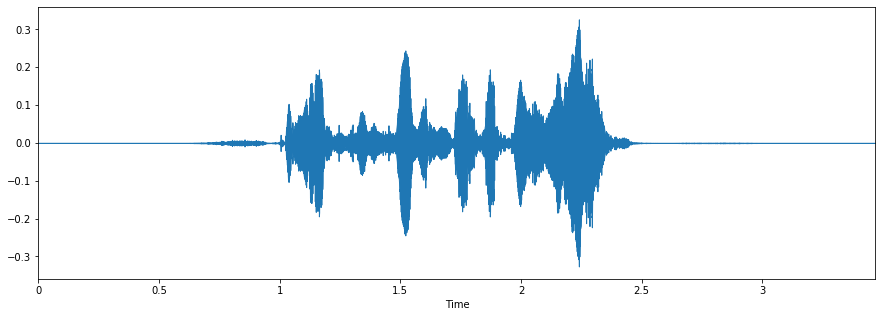

In [20]:
#picking the file with fearful emotion
fname=RAVV+'Actor_14/03-01-06-02-02-02-14.wav'
data,sampling_rate=librosa.load(fname)
plt.figure(figsize=(15,5))
librosa.display.waveplot(data,sampling_rate)

In [23]:
ipd.Audio(fname)

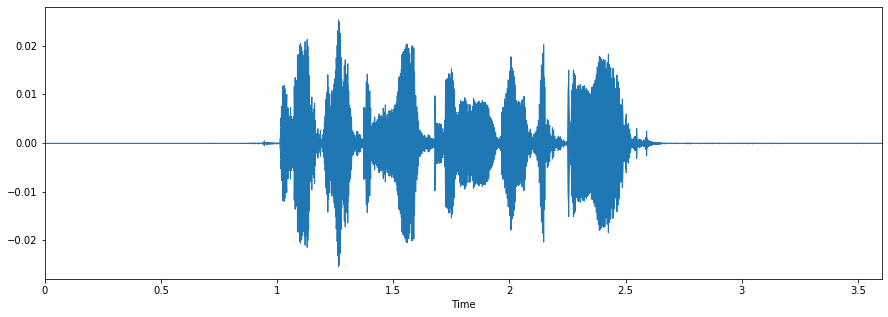

In [41]:
#picking a happy track from actor 14
fname = RAVV + 'Actor_14/03-01-04-01-01-02-14.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

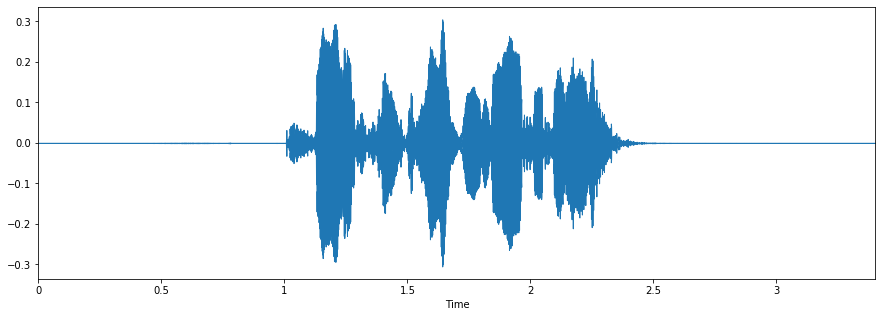

In [42]:
#picking different actors 10
#picking a surprise track 
#with high intensity

fname = RAVV + 'Actor_10/03-01-08-02-01-02-10.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

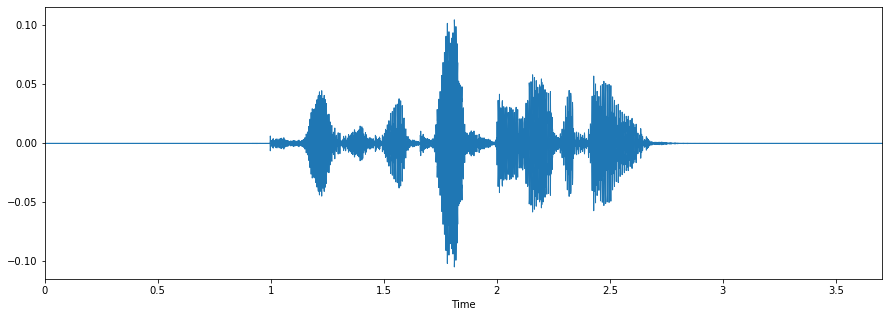

In [44]:
##picking actor 1
fname = RAVV + 'Actor_01/03-01-04-02-01-02-01.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)